In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [15]:
from model.config_classes import GridConfig
from model.utils import get_rfd
from model.simulator import RunGrid
from figs.dose_space import get_contour_data, PretendPars

from plotting.paper_figs import DoseSpaceOverview

In [3]:
LOAD = True

n_doses = 51

rs_val, sr_val = 1e-7, 1e-3

In [4]:
rr_val = get_rfd(rs_val, sr_val)

primary_inoc = dict(
    RR=rr_val,
    RS=rs_val,
    SR=sr_val,
    SS=1-rs_val-sr_val-rr_val
)

In [5]:
conf_grid = GridConfig(30, None, None, n_doses)
conf_grid.load_saved = LOAD
conf_grid.primary_inoculum = primary_inoc
conf_grid.add_string()

output = RunGrid().run(conf_grid)

In [6]:
pars = PretendPars(primary_inoc)

n_conts = 100

contour_data = get_contour_data(
    pars,
    output,
    n_conts,
    primary_inoc,
    load_saved=LOAD
)

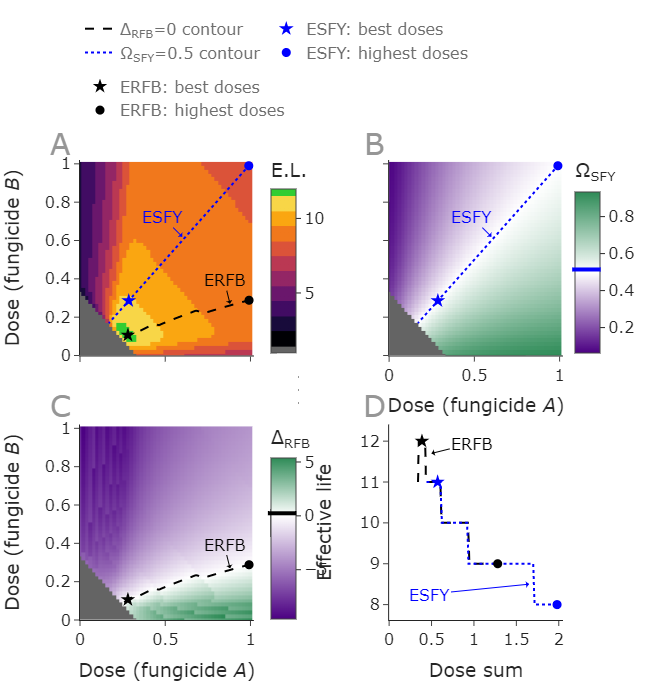

saving figure to: 
../outputs/figures/paper_figs/dose_space_overview_Ny=30_RPs=NA,_NA_PI=1e-07,_001,_1,001e-10_BSS=0_WSS=0_Nd=51_S=mix.png


In [20]:
d = DoseSpaceOverview(output, contour_data, conf_grid.config_string_img)

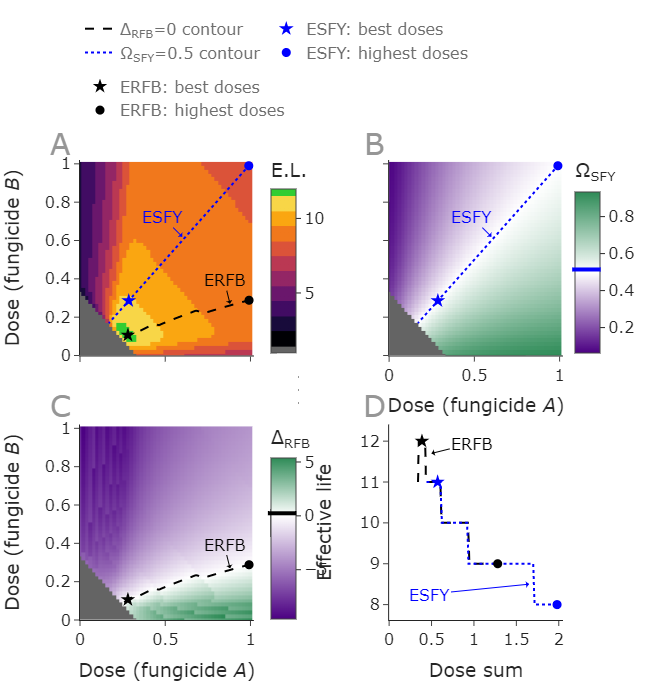

In [21]:
d.fig

In [22]:
scale = (210 / 25.4) / (800 / 300)
scale

3.1003937007874023

In [24]:
scale=4

In [25]:
d.fig.write_image('../outputs/figures/paper_figs/hires/fig3.jpg', scale=scale)

# Parameters for reporting

In [38]:
primary_inoc
# print(xx)

{'RR': 1.0010009487970706e-10,
 'RS': 1e-07,
 'SR': 0.001,
 'SS': 0.9989998998998999}